In [9]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [197]:
#loading train as df and test data as test

df=pd.read_csv("train.csv")

In [262]:
test=pd.read_csv("test.csv")

In [17]:
#created a copy of train data

df_copy=df.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [248]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
#there are missing values in both train and test data

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [263]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

So my strategy to fill the missing values would be :

Note: We'll be using df_copy for studying the correlation & df for analysis

1. I'll assign flags to the categorical features by using .map() function in order to convert all features to numerical
2. Then we'll check that the feature with missing values has the highest correlation with which feature
3. Then we'll use plots to analyse the relation of that two features 
4. & then we'll fill the missing values according to our analysis

**Assigning Flags**

In [14]:
df.Gender.unique() # we have to check unique values for all categorical variables before assigning flags

array(['Male', 'Female', nan], dtype=object)

In [19]:
df_copy.Gender=df_copy.Gender.map({"Male":1,"Female":0})

In [20]:
df_copy.Married=df_copy.Married.map({"Yes":1,"No":0})

In [21]:
df_copy.Dependents=df_copy.Dependents.map({"0":0,"1":1,"2":2,"3+":4})

In [22]:
df_copy.Education=df_copy.Education.map({"Graduate":1,"Not Graduate":0})

In [23]:
df_copy.Self_Employed=df_copy.Self_Employed.map({"Yes":1,"No":0})

In [24]:
df_copy.Property_Area=df_copy.Property_Area.map({"Rural":1,"Semiurban":2,"Urban":3})

In [26]:
df_copy.Loan_ID=df_copy.Loan_ID.str.replace("LP","").astype(int)

In [27]:
df_copy.Loan_Status=df_copy.Loan_Status.map({"Y":1,"N":0})

In [28]:
#All converted to numerical variable
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,1003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,1005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,1006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,1008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


**Studying the correlation**

In [37]:
df_copy.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.031415,-0.014705,0.050143,-0.037547,0.033295,0.019331,0.039516,0.038447,-0.030481,-0.032910,-0.158826,0.011958
Gender,-0.031415,1.000000,0.369612,0.168347,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,-0.024556,0.019857
Married,-0.014705,0.369612,1.000000,0.316592,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,0.002918,0.089280
Dependents,0.050143,0.168347,0.316592,1.000000,-0.062254,0.048433,0.134625,0.031882,0.171972,-0.101388,-0.056637,-0.005676,-0.000760
Education,-0.037547,-0.049258,-0.014223,-0.062254,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,0.065243,0.085884
Self_Employed,0.033295,-0.009829,0.001909,0.048433,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,-0.031214,-0.002303
ApplicantIncome,0.019331,0.053989,0.051332,0.134625,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.039516,0.083946,0.077770,0.031882,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.038447,0.106947,0.149519,0.171972,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.030481,-0.075117,-0.103810,-0.101388,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268


**Conclusions after studying the correlation**

1. Gender has highest correlation with Married
2. Married has highest correlation with Gender
3. Dependants has highest correlation with Married
4. Self Employed has highest correlation with Applicant Income
5. Loan Amount has highest correlation with Applicant Income
6. Loan Amount term is not much correlated to anyone
7. Credit history has highest correlation with loan status

**Now we'll start the Analysis**

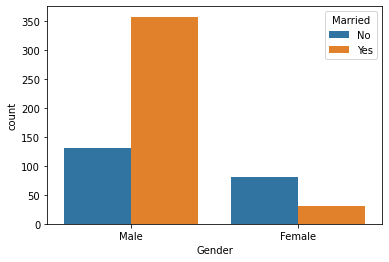

In [39]:
sns.countplot(x="Gender",hue="Married",data=df)

In [198]:
df.loc[(df["Gender"].isnull()) & (df["Married"]=="Yes"),"Gender"]="Male"

In [199]:
df.loc[(df["Gender"].isnull()) & (df["Married"]=="No"),"Gender"]="Female"

In [200]:
df.Gender.isnull().sum()

0

In [265]:
test.loc[(test["Gender"].isnull()) & (test["Married"]=="Yes"),"Gender"]="Male"

In [266]:
test.loc[(test["Gender"].isnull()) & (test["Married"]=="No"),"Gender"]="Female"

In [267]:
test.Gender.isnull().sum()

0

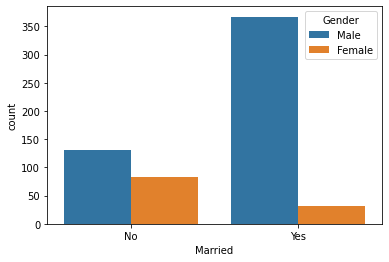

In [48]:
sns.countplot(x="Married",hue="Gender",data=df)

In [201]:
df.loc[(df["Married"].isnull()) & (df["Gender"]=="Male"),"Married"]="Yes"

In [202]:
df.loc[(df["Married"].isnull()) & (df["Gender"]=="Female"),"Married"]="No"

In [203]:
df.Married.value_counts()

Yes    400
No     214
Name: Married, dtype: int64

In [169]:
df.Married.isnull().sum()

0

In [268]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

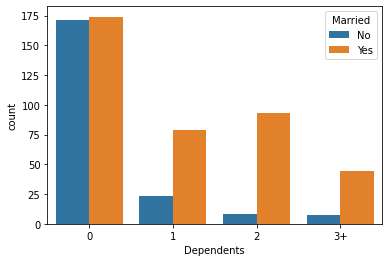

In [56]:
sns.countplot(x="Dependents",hue="Married",data=df)

In [57]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [269]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [204]:
df.Dependents=df.Dependents.fillna("0")

In [270]:
test.Dependents=test.Dependents.fillna("0")

In [271]:
test.Dependents.isnull().sum()

0

In [313]:
df.Dependents=df.Dependents.map({"0":0,"1":1,"2":2,"3+":4})

test.Dependents=test.Dependents.map({"0":0,"1":1,"2":2,"3+":4})

In [314]:
#using label encoder for dependents

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Dependents"]=le.fit_transform(df["Dependents"])
test["Dependents"]=le.fit_transform(test["Dependents"])

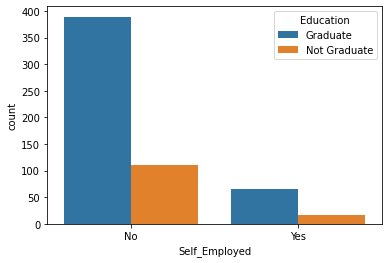

In [61]:
sns.countplot(x="Self_Employed",hue="Education",data=df)

In [205]:
df.loc[(df["Self_Employed"].isnull()) & (df["Education"]=="Graduate"),"Self_Employed"]="No"

In [206]:
df.loc[(df["Self_Employed"].isnull()) & (df["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [207]:
df.Self_Employed.isnull().sum()

0

In [273]:
test.loc[(test["Self_Employed"].isnull()) & (test["Education"]=="Graduate"),"Self_Employed"]="No"

In [274]:
test.loc[(test["Self_Employed"].isnull()) & (test["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [275]:
test.Self_Employed.isnull().sum()

0

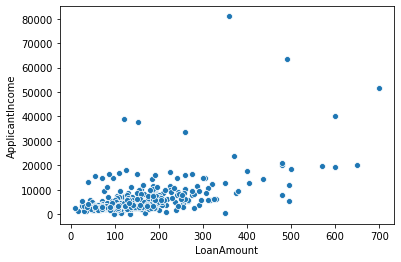

In [68]:
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=df)

In [229]:
df.LoanAmount.quantile([0.1,0.2,0.3]) #checking for outliers

0.1     72.3
0.2     96.0
0.3    109.0
Name: LoanAmount, dtype: float64

In [230]:
df.LoanAmount.quantile([1.0,0.99,0.98])

1.00    700.00
0.99    499.48
0.98    468.56
Name: LoanAmount, dtype: float64

In [231]:
df.drop(df[df["LoanAmount"]>496.36].index,axis=0,inplace=True) #removing outliers

In [232]:
df.shape #6 rows got dropped

(607, 13)

In [276]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
#We'll use fast_knn from impyute library to fill the missing values in loan amount 

In [212]:
missing_data=df[["LoanAmount","ApplicantIncome"]]

In [213]:
missing_data

,LoanAmount,ApplicantIncome
0,NaN,5849
1,128.0,4583
2,66.0,3000
3,120.0,2583
4,141.0,6000
...,...,...
609,71.0,2900
610,40.0,4106
611,253.0,8072
612,187.0,7583


In [214]:
missing_data.isnull().sum()

LoanAmount         22
ApplicantIncome     0
dtype: int64

In [106]:
import impyute as imp

In [215]:
missing_data=imp.fast_knn(missing_data,k=3)

C:\Users\admin2\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [216]:
missing_data.isnull().sum()

0    0
1    0
dtype: int64

In [217]:
missing_data.head()

,0,1
0,131.863953,5849.0
1,128.000000,4583.0
2,66.000000,3000.0
3,120.000000,2583.0
4,141.000000,6000.0


In [218]:
missing_data.columns=["LoanAmount","ApplicantIncome"]

In [219]:
missing_data.isnull().sum()

LoanAmount         0
ApplicantIncome    0
dtype: int64

In [228]:
df.LoanAmount.isnull().sum()

0

In [221]:
df["LoanAmount"]=missing_data["LoanAmount"]

In [227]:
df.LoanAmount=df.LoanAmount.round(decimals=0)

In [289]:
test_missing_data=test[["LoanAmount","ApplicantIncome"]]

In [290]:
test_missing_data=imp.fast_knn(test_missing_data,k=3)

In [294]:
test_missing_data.columns=["LoanAmount","ApplicantIncome"]

In [295]:
test_missing_data.isnull().sum()

LoanAmount         0
ApplicantIncome    0
dtype: int64

In [296]:
test["LoanAmount"]=test_missing_data["LoanAmount"]

In [300]:
test.LoanAmount=test.LoanAmount.round(decimals=0)

In [301]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [234]:
df.Loan_Amount_Term.value_counts()

360.0    508
180.0     43
480.0     14
300.0     12
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [235]:
len(df.Loan_Amount_Term.value_counts())

10

In [236]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360.0)

In [278]:
test.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [279]:
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(360.0)

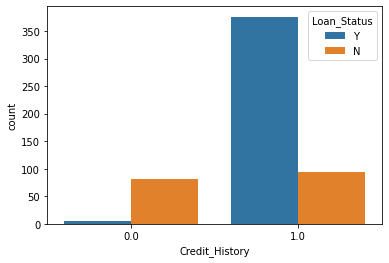

In [239]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=df)

In [242]:
df.loc[(df["Credit_History"].isnull()) & (df["Loan_Status"]=="Y"),"Credit_History"]=1.0

In [244]:
df.loc[(df["Credit_History"].isnull()) & (df["Loan_Status"]=="N"),"Credit_History"]=0.0

In [245]:
df.Credit_History.isnull().sum()

0

In [283]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [285]:
test.Credit_History=test.Credit_History.fillna(1.0)

In [286]:
test.Credit_History.isnull().sum()

0

In [302]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [303]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**Now all our missing values from both train and test datasets are removed soe we'll move on to model building**

In [425]:
#dropping loan id & self employed as they are very less correlated to target and are'nt related to any other as well
train_df=df.drop(["Loan_ID","Self_Employed"],axis=1) 

In [426]:
train_df=pd.get_dummies(train_df,drop_first=True) # one hot encoding

In [427]:
train_df.corr() #studying correlation

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Dependents,1.000000,0.086102,0.035547,0.151365,-0.091016,-0.040897,0.169286,0.335142,0.058819,-0.002943,-0.004195,0.002847
ApplicantIncome,0.086102,1.000000,-0.112508,0.476545,-0.031060,-0.003824,0.052848,0.030609,-0.132692,-0.010222,-0.016012,-0.008442
CoapplicantIncome,0.035547,-0.112508,1.000000,0.237610,-0.060889,-0.056088,0.088991,0.078906,-0.064383,-0.026186,0.026425,-0.056977
LoanAmount,0.151365,0.476545,0.237610,1.000000,0.045411,-0.030198,0.122026,0.155701,-0.170768,-0.003766,-0.064337,-0.045892
Loan_Amount_Term,-0.091016,-0.031060,-0.060889,0.045411,1.000000,-0.019112,-0.076683,-0.089338,-0.074718,0.067747,-0.101935,-0.020050
Credit_History,-0.040897,-0.003824,-0.056088,-0.030198,-0.019112,1.000000,-0.010971,0.014445,-0.071494,0.040420,-0.017791,0.607103
Gender_Male,0.169286,0.052848,0.088991,0.122026,-0.076683,-0.010971,1.000000,0.388862,0.052543,-0.109607,0.030318,0.022811
Married_Yes,0.335142,0.030609,0.078906,0.155701,-0.089338,0.014445,0.388862,1.000000,0.016824,0.000422,0.006106,0.094517
Education_Not Graduate,0.058819,-0.132692,-0.064383,-0.170768,-0.074718,-0.071494,0.052543,0.016824,1.000000,-0.040865,-0.033261,-0.088154
Property_Area_Semiurban,-0.002943,-0.010222,-0.026186,-0.003766,0.067747,0.040420,-0.109607,0.000422,-0.040865,1.000000,-0.547405,0.131356


In [319]:
X=train_df.drop(["Loan_Status_Y"],axis=1)
y=train_df["Loan_Status_Y"]

In [320]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [ ]:
# We'll not use train test split as the dataset is too small so we'll use complete dataset for training

In [428]:
X_train=train_df.drop(["Loan_Status_Y"],axis=1)
y_train=train_df["Loan_Status_Y"]
X_test=test.drop(["Loan_ID"],axis=1)

In [440]:
test_df=test.drop(["Loan_ID","Self_Employed"],axis=1)

In [441]:
X_test=pd.get_dummies(test_df,drop_first=True)

In [318]:
#Importing some more libraries

import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [615]:
# using randomized search cv for cross validation and hyperparameter tuning

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,
                                 scoring="f1" ,refit="balanced_accuracy",n_jobs=-1,cv=5,verbose=3,)


In [616]:
#defining parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ,0.50,0.75,1] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     :[50,100,300,500,1000]
}

In [617]:

random_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
     

In [618]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [631]:
#using the best estimators in our classifier

classifier=xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, 
              min_child_weight=3, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [632]:
classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [633]:
pred1=classifier.predict(X_train)


In [569]:
#results seems good

print("XGB Classifier Accuracy",metrics.accuracy_score(pred1,y_train),'\n')
print(metrics.classification_report(y_train, pred1))

XGB Classifier Accuracy 0.9736408566721582 

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       189
           1       0.97      1.00      0.98       418

    accuracy                           0.97       607
   macro avg       0.98      0.96      0.97       607
weighted avg       0.97      0.97      0.97       607



In [639]:
#now we'll predict the test data and then create the submission file

In [635]:
pred1=classifier.predict(X_test)
pred=pd.DataFrame(pred1)
sm=pd.read_csv("sample.csv")
submit=pd.concat([sm.Loan_ID,pred],axis=1)
submit.columns=["Loan_ID","Loan_Status"]

In [636]:
submit.Loan_Status=submit.Loan_Status.map({1:"Y",0:"N"})

In [637]:
submit.Loan_Status.value_counts()

Y    283
N     84
Name: Loan_Status, dtype: int64

In [638]:
submit.to_csv("SubmissionFINAL.csv",index=False)

**Done!!**

***Keep Learning !!!***